# R Analysis
### Import and load the needed packages

In [ ]:
# Run this once
install.packages("corrplot")  

: 

In [ ]:
library(ggplot2)
library(dplyr)
library(readr)
library(corrplot)

: 

### Load the dataset
Note: You may need to change the filepath to point to where your dataset lives.

In [8]:
df <- read_csv("~/Educate2025_Coffee/final_global_coffee_productivity_enhanced.csv")


Rows: 500 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Country, Job_Role, Work_From_Home, Age_Group, Gender, Coffee_Type
dbl (5): Coffee_Consumption, Productivity_Score, Sleep_Hours, Stress_Level, Age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Let the analysis begin!
Everyone's relationship with coffee is different - some people need their cup before they're functional for the day, while others are sensitive to the caffeine effects and stay away. Let's start by creating a histogram of overall coffee consumption to view this spread!

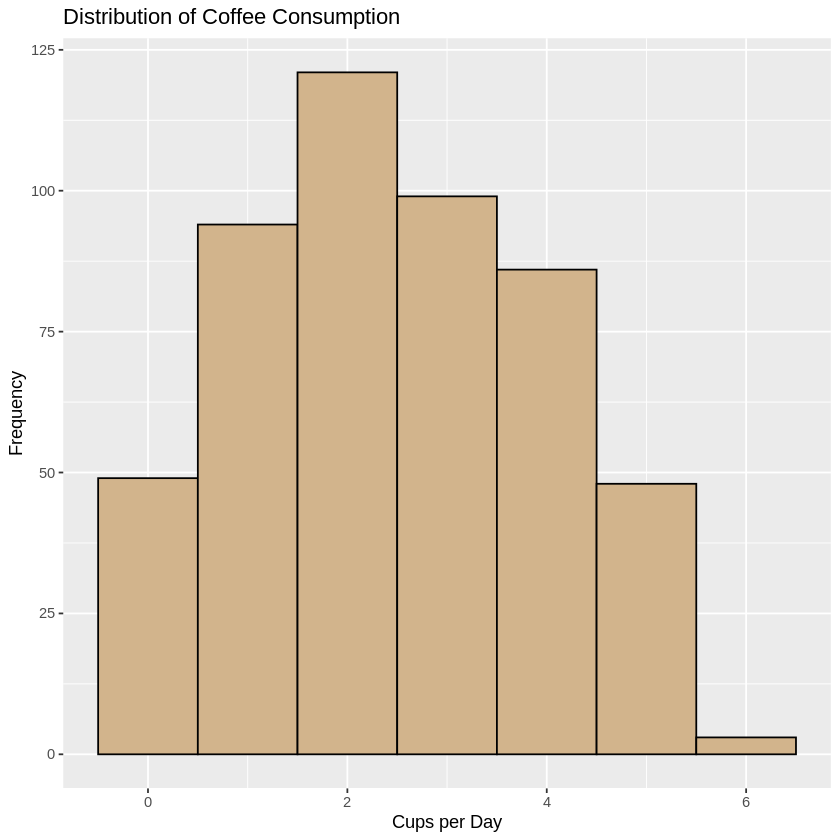

In [5]:
ggplot(df, aes(x = Coffee_Consumption)) +
  geom_histogram(binwidth = 1, fill = "tan", color = "black") +
  labs(title = "Distribution of Coffee Consumption",
       x = "Cups per Day", y = "Frequency")


Looks pretty normal to me! Where do you fit into this curve - does coffee affect your productivity? What about your sleep? Does it calm your stress or add to it? 

Let's check out the correlations between the numeric variables!

                   Coffee_Consumption Productivity_Score  Sleep_Hours
Coffee_Consumption        1.000000000        0.007436995  0.002505129
Productivity_Score        0.007436995        1.000000000  0.946580370
Sleep_Hours               0.002505129        0.946580370  1.000000000
Stress_Level             -0.026669575       -0.058353028 -0.087320718
                   Stress_Level
Coffee_Consumption  -0.02666957
Productivity_Score  -0.05835303
Sleep_Hours         -0.08732072
Stress_Level         1.00000000


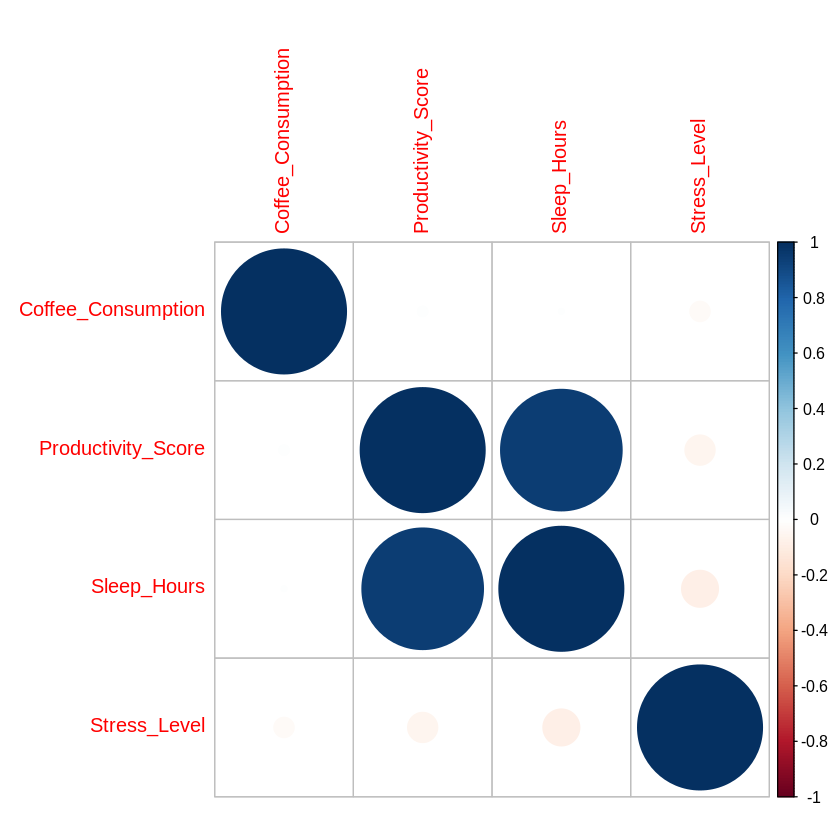

In [6]:
# Select only numeric columns
numeric_df <- df[sapply(df, is.numeric)]

# Compute correlation matrix
cor_matrix <- cor(numeric_df, use = "complete.obs")

# Print the matrix
print(cor_matrix)
corrplot(cor_matrix, method = "circle")

Interesting! Sleep Hours and Productivity seem to be strongly correlated - makes sense. Let's look at one final graph - a scatterplot - to dive deeper into the relationship between Sleep Hours and Productivity.

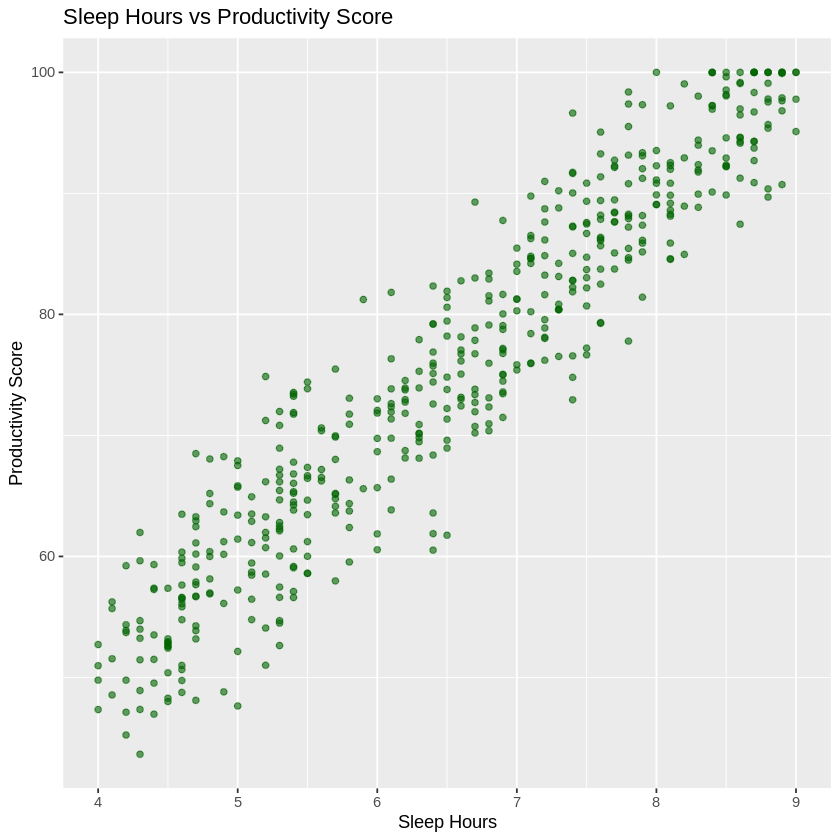

In [7]:
ggplot(df, aes(x = Sleep_Hours, y = Productivity_Score)) +
  geom_point(alpha = 0.6, color = "darkgreen") +
  labs(title = "Sleep Hours vs Productivity Score",
       x = "Sleep Hours", y = "Productivity Score")


### ANOVA

In [ ]:

# Convert 'Country' to a factor if it's not already
df$Country <- as.factor(df$Country)

# Run one-way ANOVA
anova_result <- aov(Coffee_Consumption ~ Country, data = df)

# Display summary of the ANOVA
summary(anova_result)